In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pathlib import Path
from statistics import mean
import matplotlib.pyplot as plt

In [57]:
# ------------------------------- setting start ------------------------------ #
# color
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
errorbar_color = "#3A3A3A"

# font
csfont = {'family':'Times New Roman', 'serif': 'Times' , 'size' : 23}
plt.rc('text', usetex=True)
plt.rc('font', **csfont)

# bar plot size
bar_width = 0.4
bar_btw_space = 0.04
bar_space = 0.2

# errorbar plot size
err_lw=1.5
err_capsize=4
err_capthick=1.5

# set fig size
figsize=(6.4, 4.8)
# -------------------------------- setting end ------------------------------- #

In [48]:
# Generate csv
def merge_csv():
    source_model = "albef"
    # target_model = "tcl"
    target_model = "clip-vit"
    # num_of_img_list = ["baseline", 1000, 5000, 10000, 20000]
    num_of_img_list = [1000, 5000, 10000, 20000]
    save_filepath = Path(".")/"csv_all"/f"{source_model}2{target_model}_all.csv"
    
    dfs = []
    for num_of_image in num_of_img_list:
        filePath = Path(".")/"csv_all"/f"{source_model}2{target_model}"/f"eval_results_{num_of_image}.csv"
        df_tmp = pd.read_csv(filePath)
        # df_tmp["filename"] = os.path.basename(filePath)  # tag with filename for distinguishing
        df_tmp["num_of_img"] = num_of_image
        dfs.append(df_tmp)

    # Merge all CSVs into one DataFrame
    df = pd.concat(dfs, ignore_index=True)
    print(df)
    
    df.to_csv(save_filepath, index=False)  # index=False 讓輸出不要多一個 index 欄位
    

merge_csv()

   txt_r1_ASR  txt_r1  txt_r5_ASR  txt_r5  txt_r10_ASR  txt_r10  img_r1_ASR  \
0       74.66  25.100       64.53  35.400        62.70    37.30       96.14   
1       25.89  71.200        8.10  91.600         4.67    95.20       50.16   
2       97.18   2.900       84.47  14.560        82.70    16.86       99.30   
3       85.89  13.640       28.66  69.640        17.99    80.30       91.01   
4       99.37   1.100       95.69   5.400        91.10    10.93       99.58   
5       92.52   6.690       62.72  35.020        29.67    69.39       95.75   
6       99.69   0.395       98.10   1.995        96.00     3.99       99.70   
7       98.04   3.355       83.70  17.265        64.63    34.66       97.74   

   img_r1  img_r5_ASR  img_r5  img_r10_ASR  img_r10     model  num_of_img  
0   3.540       95.55   4.340        95.47    4.480     ALBEF        1000  
1  40.500       31.39  64.120        23.66   73.340  ViT-B/16        1000  
2   0.680       98.71   1.156        98.69    1.188     ALBE

   txt_r1_ASR  txt_r1  txt_r5_ASR  txt_r5  txt_r10_ASR  txt_r10  img_r1_ASR  \
1       21.71    75.4        7.04    92.7         4.11     95.8       36.19   
3       21.92    76.7       13.47    86.5        12.02     88.0       49.10   

   img_r1  img_r5_ASR  img_r5  img_r10_ASR  img_r10 model num_of_img  
1   55.12       19.56   78.38        14.52    84.44   TCL   baseline  
3   45.62       38.23   60.56        36.41    62.90   TCL       1000  


/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

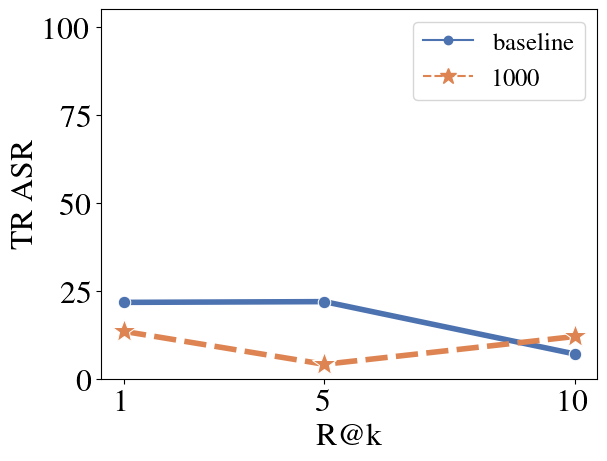

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

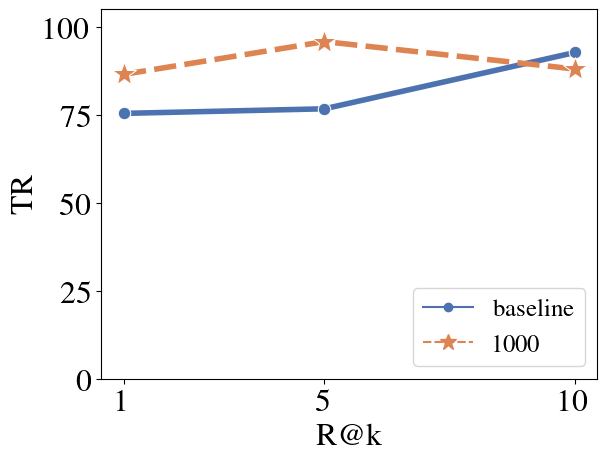

In [63]:
def TR_ASR_baseline_and_1000():
    roundNum = 0
    
    saveDir = Path(".")/"figs"/f"round{roundNum}"
    saveDir.mkdir(parents=True, exist_ok=True)
    
    filePath = Path(".")/"csv_all"/"albef2tcl_all.csv"
    df = pd.read_csv(filePath)
    
    # Step 1: change to plotting format and filter
    df_plot = df
    df_plot = df_plot[(df_plot["model"] == "TCL")]
    df_plot = df_plot[(df_plot["num_of_img"] == "1000") | (df_plot["num_of_img"] == "baseline")]
    
    print(df_plot)
    
    # 整理成 long format，x 用數字 1,5,10
    df_long = pd.DataFrame({
        "metric": [1, 5, 10] * len(df_plot),
        "ASR": pd.concat([df_plot["txt_r1_ASR"], df_plot["txt_r5_ASR"], df_plot["txt_r10_ASR"]], ignore_index=True),
        "num_of_img": df_plot["num_of_img"].repeat(3).reset_index(drop=True)
    })

    # 畫 lineplot
    ax = sns.lineplot(x='metric', y='ASR',
                    hue= "num_of_img",
                    style="num_of_img", 
                    data=df_long, 
                    errorbar=('ci', 95), err_style="bars",
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=18,
                    lw=4
                    )
    
    ax.set(ylim = (0, 105))
    # plt.title("Text Retrieval ASR vs Recall Metric")
    plt.xlabel("R@k")
    plt.ylabel("TR ASR")
    plt.xticks([1,5,10])  # 固定 X 軸刻度
    plt.legend(title='', loc='upper right', fontsize="18", ncol=1, markerscale=2)
    plt.show()
    
    # 整理成 long format，x 用數字 1,5,10
    df_long = pd.DataFrame({
        "metric": [1, 5, 10] * len(df_plot),
        "TR": pd.concat([df_plot["txt_r1"], df_plot["txt_r5"], df_plot["txt_r10"]], ignore_index=True),
        "num_of_img": df_plot["num_of_img"].repeat(3).reset_index(drop=True)
    })

    # 畫 lineplot
    ax = sns.lineplot(x='metric', y='TR',
                    hue= "num_of_img",
                    style="num_of_img", 
                    data=df_long, 
                    errorbar=('ci', 95), err_style="bars",
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=18,
                    lw=4
                    )
    
    ax.set(ylim = (0, 105))
    # plt.title("Text Retrieval ASR vs Recall Metric")
    plt.xlabel("R@k")
    plt.ylabel("TR")
    plt.xticks([1,5,10])  # 固定 X 軸刻度
    plt.legend(title='', loc='lower right', fontsize="18", ncol=1, markerscale=2)
    plt.show()
    
TR_ASR_baseline_and_1000() 

   txt_r1_ASR  txt_r1  txt_r5_ASR  txt_r5  txt_r10_ASR  txt_r10  img_r1_ASR  \
1       21.71    75.4        7.04    92.7         4.11     95.8       36.19   
3       21.92    76.7       13.47    86.5        12.02     88.0       49.10   

   img_r1  img_r5_ASR  img_r5  img_r10_ASR  img_r10 model num_of_img  
1   55.12       19.56   78.38        14.52    84.44   TCL   baseline  
3   45.62       38.23   60.56        36.41    62.90   TCL       1000  


/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

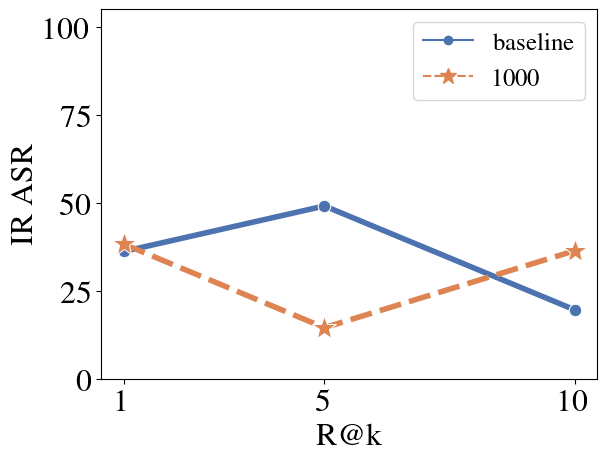

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

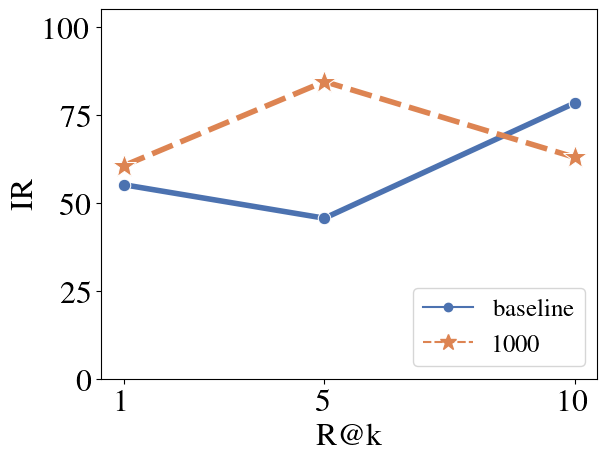

In [64]:
def IR_ASR_baseline_and_1000():
    roundNum = 0
    
    saveDir = Path(".")/"figs"/f"round{roundNum}"
    saveDir.mkdir(parents=True, exist_ok=True)
    
    filePath = Path(".")/"csv_all"/"albef2tcl_all.csv"
    df = pd.read_csv(filePath)
    
    # Step 1: change to plotting format and filter
    df_plot = df
    df_plot = df_plot[(df_plot["model"] == "TCL")]
    df_plot = df_plot[(df_plot["num_of_img"] == "1000") | (df_plot["num_of_img"] == "baseline")]
    
    print(df_plot)
    
    # 整理成 long format，x 用數字 1,5,10
    df_long = pd.DataFrame({
        "metric": [1, 5, 10] * len(df_plot),
        "ASR": pd.concat([df_plot["img_r1_ASR"], df_plot["img_r5_ASR"], df_plot["img_r10_ASR"]], ignore_index=True),
        "num_of_img": df_plot["num_of_img"].repeat(3).reset_index(drop=True)
    })

    # 畫 lineplot
    ax = sns.lineplot(x='metric', y='ASR',
                    hue= "num_of_img",
                    style="num_of_img", 
                    data=df_long, 
                    errorbar=('ci', 95), err_style="bars",
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=18,
                    lw=4
                    )
    
    ax.set(ylim = (0, 105))
    # plt.title("Text Retrieval ASR vs Recall Metric")
    plt.xlabel("R@k")
    plt.ylabel("IR ASR")
    plt.xticks([1,5,10])  # 固定 X 軸刻度
    plt.legend(title='', loc='upper right', fontsize="18", ncol=1, markerscale=2)
    plt.show()
    
    # 整理成 long format，x 用數字 1,5,10
    df_long = pd.DataFrame({
        "metric": [1, 5, 10] * len(df_plot),
        "IR": pd.concat([df_plot["img_r1"], df_plot["img_r5"], df_plot["img_r10"]], ignore_index=True),
        "num_of_img": df_plot["num_of_img"].repeat(3).reset_index(drop=True)
    })

    # 畫 lineplot
    ax = sns.lineplot(x='metric', y='IR',
                    hue= "num_of_img",
                    style="num_of_img", 
                    data=df_long, 
                    errorbar=('ci', 95), err_style="bars",
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=18,
                    lw=4
                    )
    
    ax.set(ylim = (0, 105))
    # plt.title("Text Retrieval ASR vs Recall Metric")
    plt.xlabel("R@k")
    plt.ylabel("IR")
    plt.xticks([1,5,10])  # 固定 X 軸刻度
    plt.legend(title='', loc='lower right', fontsize="18", ncol=1, markerscale=2)
    plt.show()
    
IR_ASR_baseline_and_1000() 

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

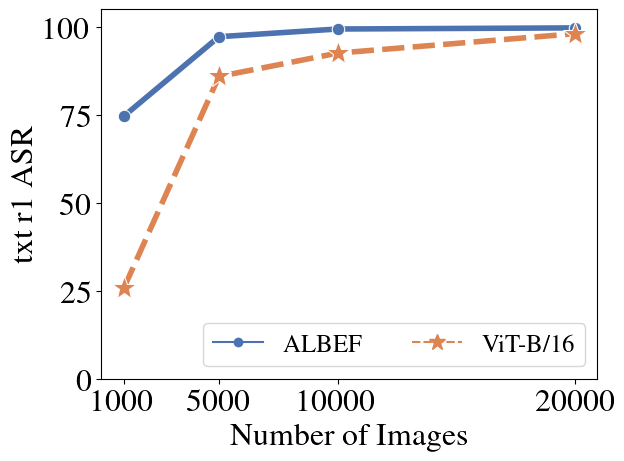

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

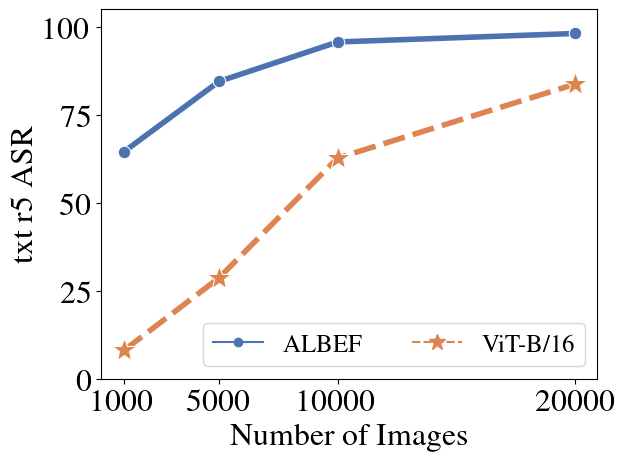

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

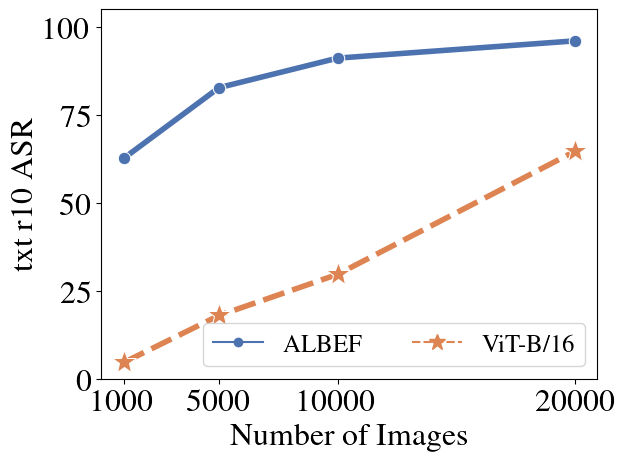

In [65]:
def txt_img_ASR():
    roundNum = 0
    
    saveDir = Path(".")/"figs"/f"round{roundNum}"
    saveDir.mkdir(parents=True, exist_ok=True)
    
    # filePath = Path(".")/"csv_all"/"albef2tcl_all.csv"
    filePath = Path(".")/"csv_all"/"albef2clip-vit_all.csv"
    df = pd.read_csv(filePath)
    
    # Step 1: change to plotting format and filter
    df_plot = df
    
    # df_plot['encode_size'] = df_plot['encode_size'] * 8 / df_plot['numOf3DGS']
    # df_plot['alg'] = df_plot['alg'].replace(['draco'], 'DRACO')
    
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['drjohnson'], 'DJ')
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['playroom'], 'PR')
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['train'], 'Train')
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['truck'], 'Truck')
    
    # Step 2: plot
    # txt_r1_ASR
    ax = sns.lineplot(x='num_of_img', y='txt_r1_ASR',
                    hue= "model",
                    style="model", 
                    data=df_plot, 
                    errorbar=('ci', 95), err_style="bars",
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=18,
                    lw=4
                    )
    
    ax.set(xlabel='Number of Images', ylabel='txt r1 ASR')
    ax.set(ylim = (0, 105))
    ax.set_xticks([1000, 5000, 10000, 20000])
    plt.legend(title='', loc='lower right', fontsize="18", ncol=2, markerscale=2)
    # plt.savefig(f'{saveDir}/compression_size_scene.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'{saveDir}/compression_size_scene.eps', dpi=300, bbox_inches='tight')
    plt.show()

    # txt_r5_ASR
    ax = sns.lineplot(x='num_of_img', y='txt_r5_ASR',
                    hue= "model",
                    style="model", 
                    data=df_plot, 
                    errorbar=('ci', 95), err_style="bars",
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=18,
                    lw=4
                    )
    
    ax.set(xlabel='Number of Images', ylabel='txt r5 ASR')
    ax.set(ylim = (0, 105))
    ax.set_xticks([1000, 5000, 10000, 20000])
    plt.legend(title='', loc='lower right', fontsize="18", ncol=2, markerscale=2)
    # plt.savefig(f'{saveDir}/compression_size_scene.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'{saveDir}/compression_size_scene.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    # txt_r10_ASR
    ax = sns.lineplot(x='num_of_img', y='txt_r10_ASR',
                    hue= "model",
                    style="model", 
                    data=df_plot, 
                    errorbar=('ci', 95), err_style="bars",
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=18,
                    lw=4
                    )
    
    ax.set(xlabel='Number of Images', ylabel='txt r10 ASR')
    ax.set(ylim = (0, 105))
    ax.set_xticks([1000, 5000, 10000, 20000])
    plt.legend(title='', loc='lower right', fontsize="18", ncol=2, markerscale=2)
    # plt.savefig(f'{saveDir}/compression_size_scene.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'{saveDir}/compression_size_scene.eps', dpi=300, bbox_inches='tight')
    plt.show()

    
    # average_y_per_x = df_plot.groupby(['cl_value', 'scene_name'])['encode_size'].mean().reset_index()
    # print(average_y_per_x)
    
txt_img_ASR() 

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

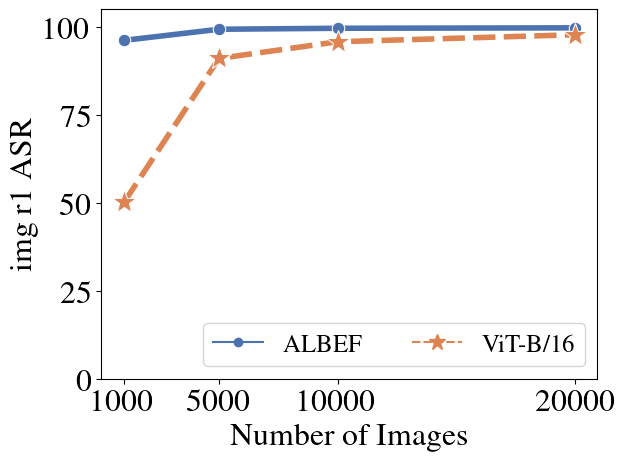

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

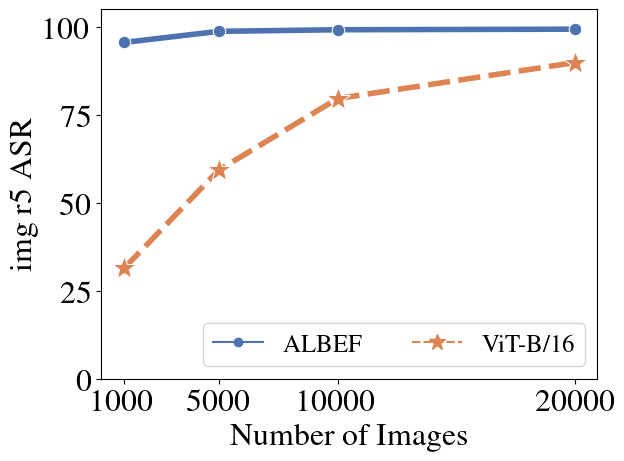

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

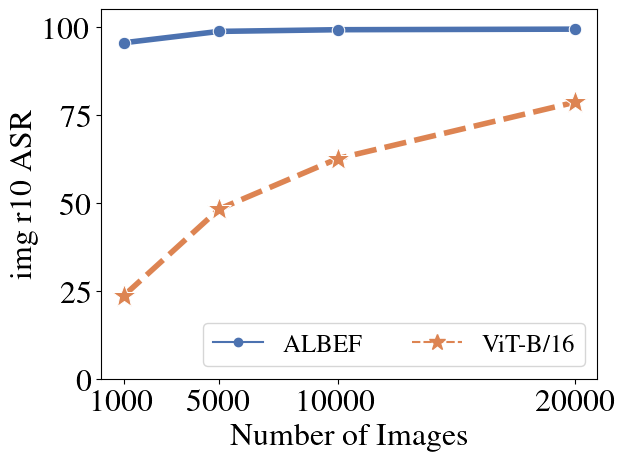

In [66]:
def txt2img_ASR():
    roundNum = 0
    
    saveDir = Path(".")/"figs"/f"round{roundNum}"
    saveDir.mkdir(parents=True, exist_ok=True)
    
    # filePath = Path(".")/"csv_all"/"albef2tcl_all.csv"
    filePath = Path(".")/"csv_all"/"albef2clip-vit_all.csv"
    df = pd.read_csv(filePath)
    
    # Step 1: change to plotting format and filter
    df_plot = df
    
    # df_plot['encode_size'] = df_plot['encode_size'] * 8 / df_plot['numOf3DGS']
    # df_plot['alg'] = df_plot['alg'].replace(['draco'], 'DRACO')
    
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['drjohnson'], 'DJ')
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['playroom'], 'PR')
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['train'], 'Train')
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['truck'], 'Truck')
    
    # Step 2: plot
    # txt_r1_ASR
    ax = sns.lineplot(x='num_of_img', y='img_r1_ASR',
                    hue= "model",
                    style="model", 
                    data=df_plot, 
                    errorbar=('ci', 95), err_style="bars",
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=18,
                    lw=4
                    )
    
    ax.set(xlabel='Number of Images', ylabel='img r1 ASR')
    ax.set(ylim = (0, 105))
    ax.set_xticks([1000, 5000, 10000, 20000])
    plt.legend(title='', loc='lower right', fontsize="18", ncol=2, markerscale=2)
    # plt.savefig(f'{saveDir}/compression_size_scene.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'{saveDir}/compression_size_scene.eps', dpi=300, bbox_inches='tight')
    plt.show()

    # txt_r5_ASR
    ax = sns.lineplot(x='num_of_img', y='img_r5_ASR',
                    hue= "model",
                    style="model", 
                    data=df_plot, 
                    errorbar=('ci', 95), err_style="bars",
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=18,
                    lw=4
                    )
    
    ax.set(xlabel='Number of Images', ylabel='img r5 ASR')
    ax.set(ylim = (0, 105))
    ax.set_xticks([1000, 5000, 10000, 20000])
    plt.legend(title='', loc='lower right', fontsize="18", ncol=2, markerscale=2)
    # plt.savefig(f'{saveDir}/compression_size_scene.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'{saveDir}/compression_size_scene.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    # txt_r10_ASR
    ax = sns.lineplot(x='num_of_img', y='img_r10_ASR',
                    hue= "model",
                    style="model", 
                    data=df_plot, 
                    errorbar=('ci', 95), err_style="bars",
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=18,
                    lw=4
                    )
    
    ax.set(xlabel='Number of Images', ylabel='img r10 ASR')
    ax.set(ylim = (0, 105))
    ax.set_xticks([1000, 5000, 10000, 20000])
    plt.legend(title='', loc='lower right', fontsize="18", ncol=2, markerscale=2)
    # plt.savefig(f'{saveDir}/compression_size_scene.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'{saveDir}/compression_size_scene.eps', dpi=300, bbox_inches='tight')
    plt.show()

    
    # average_y_per_x = df_plot.groupby(['cl_value', 'scene_name'])['encode_size'].mean().reset_index()
    # print(average_y_per_x)
    
txt2img_ASR() 

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

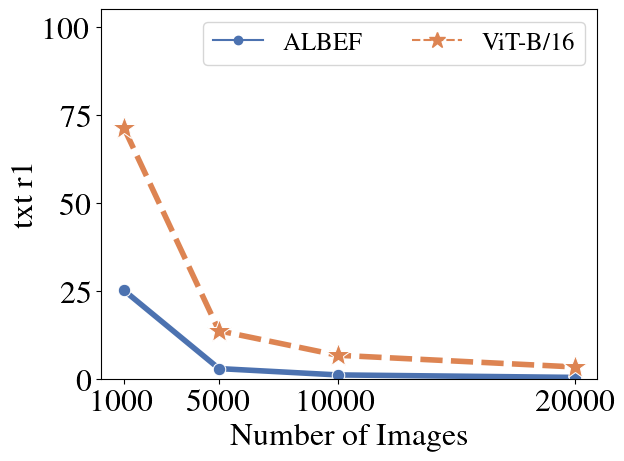

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

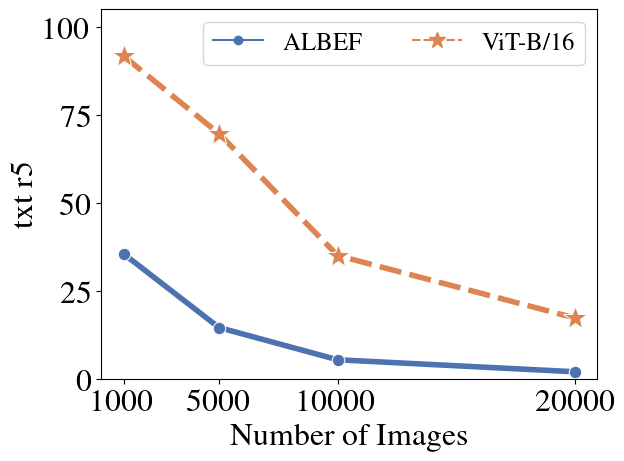

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

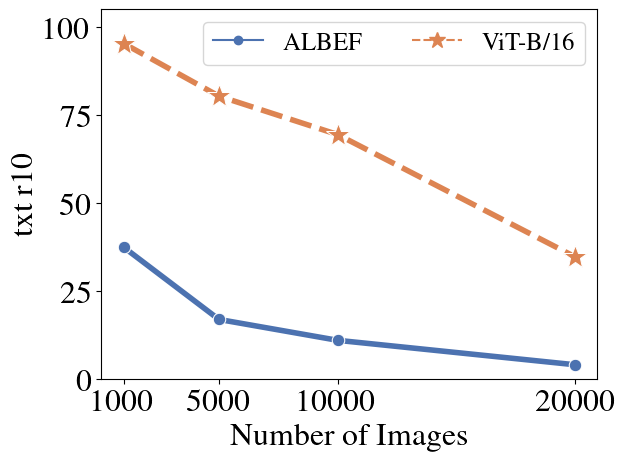

In [67]:
def img2txt_TR():
    roundNum = 0
    
    saveDir = Path(".")/"figs"/f"round{roundNum}"
    saveDir.mkdir(parents=True, exist_ok=True)
    
    # filePath = Path(".")/"csv_all"/"albef2tcl_all.csv"
    filePath = Path(".")/"csv_all"/"albef2clip-vit_all.csv"
    df = pd.read_csv(filePath)
    
    # Step 1: change to plotting format and filter
    df_plot = df
    
    # df_plot['encode_size'] = df_plot['encode_size'] * 8 / df_plot['numOf3DGS']
    # df_plot['alg'] = df_plot['alg'].replace(['draco'], 'DRACO')
    
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['drjohnson'], 'DJ')
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['playroom'], 'PR')
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['train'], 'Train')
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['truck'], 'Truck')
    
    # Step 2: plot
    # txt_r1_ASR
    ax = sns.lineplot(x='num_of_img', y='txt_r1',
                    hue= "model",
                    style="model", 
                    data=df_plot, 
                    errorbar=('ci', 95), err_style="bars",
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=18,
                    lw=4
                    )
    
    ax.set(xlabel='Number of Images', ylabel='txt r1')
    ax.set(ylim = (0, 105))
    ax.set_xticks([1000, 5000, 10000, 20000])
    plt.legend(title='', loc='upper right', fontsize="18", ncol=2, markerscale=2)
    # plt.savefig(f'{saveDir}/compression_size_scene.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'{saveDir}/compression_size_scene.eps', dpi=300, bbox_inches='tight')
    plt.show()

    # txt_r5_ASR
    ax = sns.lineplot(x='num_of_img', y='txt_r5',
                    hue= "model",
                    style="model", 
                    data=df_plot, 
                    errorbar=('ci', 95), err_style="bars",
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=18,
                    lw=4
                    )
    
    ax.set(xlabel='Number of Images', ylabel='txt r5')
    ax.set(ylim = (0, 105))
    ax.set_xticks([1000, 5000, 10000, 20000])
    plt.legend(title='', loc='upper right', fontsize="18", ncol=2, markerscale=2)
    # plt.savefig(f'{saveDir}/compression_size_scene.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'{saveDir}/compression_size_scene.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    # txt_r10_ASR
    ax = sns.lineplot(x='num_of_img', y='txt_r10',
                    hue= "model",
                    style="model", 
                    data=df_plot, 
                    errorbar=('ci', 95), err_style="bars",
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=18,
                    lw=4
                    )
    
    ax.set(xlabel='Number of Images', ylabel='txt r10')
    ax.set(ylim = (0, 105))
    ax.set_xticks([1000, 5000, 10000, 20000])
    plt.legend(title='', loc='upper right', fontsize="18", ncol=2, markerscale=2)
    # plt.savefig(f'{saveDir}/compression_size_scene.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'{saveDir}/compression_size_scene.eps', dpi=300, bbox_inches='tight')
    plt.show()

    
    # average_y_per_x = df_plot.groupby(['cl_value', 'scene_name'])['encode_size'].mean().reset_index()
    # print(average_y_per_x)
    
img2txt_TR() 

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

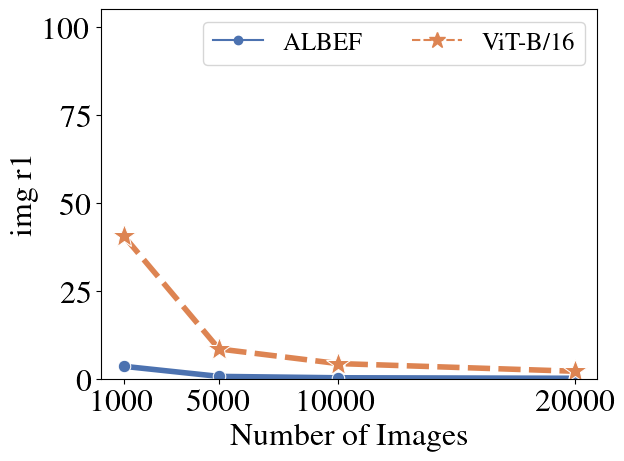

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

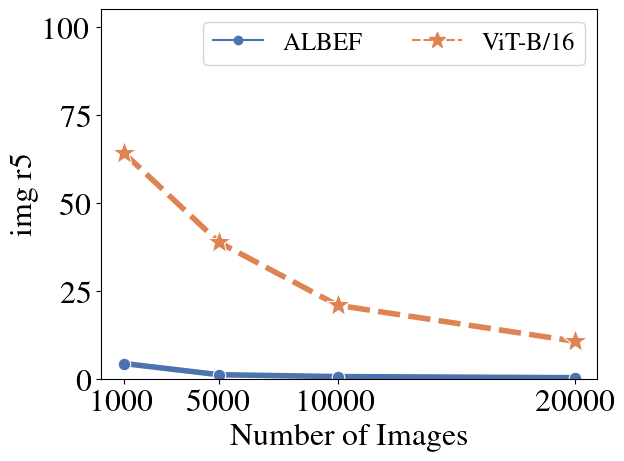

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

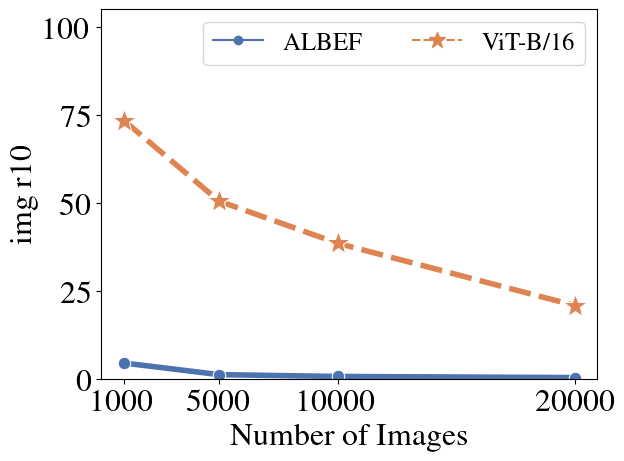

In [68]:
def txt2img_IR():
    roundNum = 0
    
    saveDir = Path(".")/"figs"/f"round{roundNum}"
    saveDir.mkdir(parents=True, exist_ok=True)
    
    # filePath = Path(".")/"csv_all"/"albef2tcl_all.csv"
    filePath = Path(".")/"csv_all"/"albef2clip-vit_all.csv"
    df = pd.read_csv(filePath)
    
    # Step 1: change to plotting format and filter
    df_plot = df
    
    # df_plot['encode_size'] = df_plot['encode_size'] * 8 / df_plot['numOf3DGS']
    # df_plot['alg'] = df_plot['alg'].replace(['draco'], 'DRACO')
    
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['drjohnson'], 'DJ')
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['playroom'], 'PR')
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['train'], 'Train')
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['truck'], 'Truck')
    
    # Step 2: plot
    # txt_r1_ASR
    ax = sns.lineplot(x='num_of_img', y='img_r1',
                    hue= "model",
                    style="model", 
                    data=df_plot, 
                    errorbar=('ci', 95), err_style="bars",
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=18,
                    lw=4
                    )
    
    ax.set(xlabel='Number of Images', ylabel='img r1')
    ax.set(ylim = (0, 105))
    ax.set_xticks([1000, 5000, 10000, 20000])
    plt.legend(title='', loc='upper right', fontsize="18", ncol=2, markerscale=2)
    # plt.savefig(f'{saveDir}/compression_size_scene.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'{saveDir}/compression_size_scene.eps', dpi=300, bbox_inches='tight')
    plt.show()

    # txt_r5_ASR
    ax = sns.lineplot(x='num_of_img', y='img_r5',
                    hue= "model",
                    style="model", 
                    data=df_plot, 
                    errorbar=('ci', 95), err_style="bars",
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=18,
                    lw=4
                    )
    
    ax.set(xlabel='Number of Images', ylabel='img r5')
    ax.set(ylim = (0, 105))
    ax.set_xticks([1000, 5000, 10000, 20000])
    plt.legend(title='', loc='upper right', fontsize="18", ncol=2, markerscale=2)
    # plt.savefig(f'{saveDir}/compression_size_scene.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'{saveDir}/compression_size_scene.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    # txt_r10_ASR
    ax = sns.lineplot(x='num_of_img', y='img_r10',
                    hue= "model",
                    style="model", 
                    data=df_plot, 
                    errorbar=('ci', 95), err_style="bars",
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=18,
                    lw=4
                    )
    
    ax.set(xlabel='Number of Images', ylabel='img r10')
    ax.set(ylim = (0, 105))
    ax.set_xticks([1000, 5000, 10000, 20000])
    plt.legend(title='', loc='upper right', fontsize="18", ncol=2, markerscale=2)
    # plt.savefig(f'{saveDir}/compression_size_scene.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'{saveDir}/compression_size_scene.eps', dpi=300, bbox_inches='tight')
    plt.show()

    
    # average_y_per_x = df_plot.groupby(['cl_value', 'scene_name'])['encode_size'].mean().reset_index()
    # print(average_y_per_x)
    
txt2img_IR() 

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

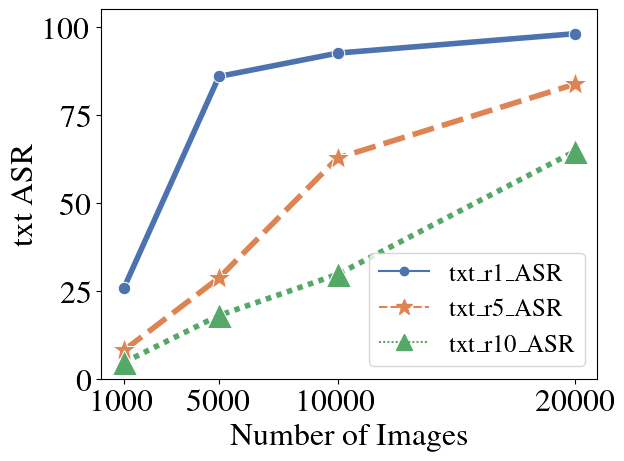

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

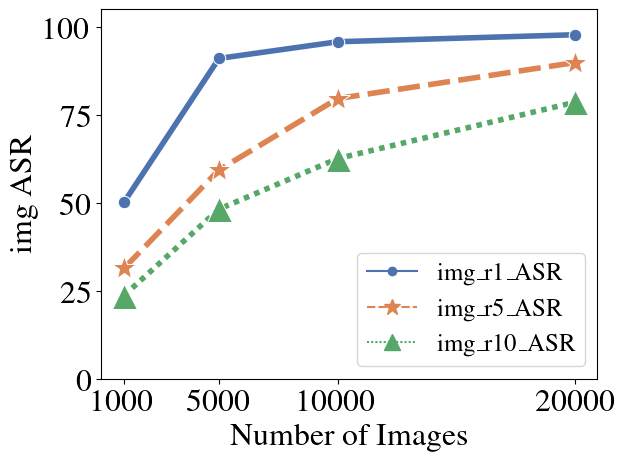

In [70]:
def txt2img_img2txt_ASR_diffRk():
    roundNum = 0
    
    saveDir = Path(".")/"figs"/f"round{roundNum}"
    saveDir.mkdir(parents=True, exist_ok=True)
    
    # filePath = Path(".")/"csv_all"/"albef2tcl_all.csv"
    filePath = Path(".")/"csv_all"/"albef2clip-vit_all.csv"
    df = pd.read_csv(filePath)
    
    # Step 1: change to plotting format and filter
    df_plot = df[df["model"] == "ViT-B/16"]
    
    # Melt into long format
    df_txt_melted = df_plot.melt(id_vars="num_of_img",
                            value_vars=["txt_r1_ASR", "txt_r5_ASR", "txt_r10_ASR"],
                            var_name="ASR_Type",
                            value_name="ASR_Value")
    
    df_img_melted = df_plot.melt(id_vars="num_of_img",
                            value_vars=["img_r1_ASR", "img_r5_ASR", "img_r10_ASR"],
                            var_name="ASR_Type",
                            value_name="ASR_Value")
    
    # df_plot['encode_size'] = df_plot['encode_size'] * 8 / df_plot['numOf3DGS']
    # df_plot['alg'] = df_plot['alg'].replace(['draco'], 'DRACO')
    
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['drjohnson'], 'DJ')
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['playroom'], 'PR')
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['train'], 'Train')
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['truck'], 'Truck')
    
    # Step 2: plot
    # Target
    # txt asr
    ax = sns.lineplot(data=df_txt_melted, 
                    x="num_of_img", y="ASR_Value", 
                    hue="ASR_Type", 
                    style="ASR_Type", 
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=18,
                    lw=4)
    
    ax.set(xlabel='Number of Images', ylabel='txt ASR')
    ax.set(ylim = (0, 105))
    ax.set_xticks([1000, 5000, 10000, 20000])
    plt.legend(title='', loc='lower right', fontsize="18", ncol=1, markerscale=2)
    # plt.savefig(f'{saveDir}/compression_size_scene.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'{saveDir}/compression_size_scene.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Target
    # img asr
    ax = sns.lineplot(data=df_img_melted, 
                    x="num_of_img", y="ASR_Value", 
                    hue="ASR_Type", 
                    style="ASR_Type", 
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=18,
                    lw=4)
    
    ax.set(xlabel='Number of Images', ylabel='img ASR')
    ax.set(ylim = (0, 105))
    ax.set_xticks([1000, 5000, 10000, 20000])
    plt.legend(title='', loc='lower right', fontsize="18", ncol=1, markerscale=2)
    # plt.savefig(f'{saveDir}/compression_size_scene.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'{saveDir}/compression_size_scene.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    # average_y_per_x = df_plot.groupby(['cl_value', 'scene_name'])['encode_size'].mean().reset_index()
    # print(average_y_per_x)
    
txt2img_img2txt_ASR_diffRk() 

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

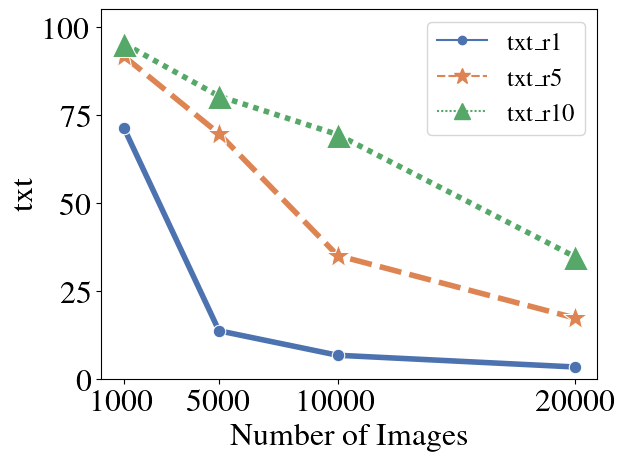

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

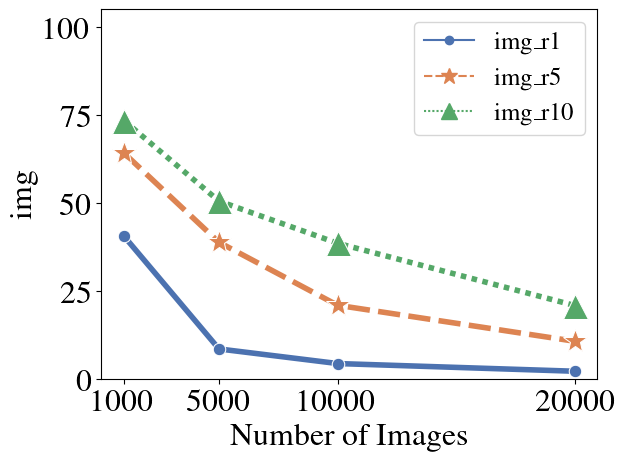

In [72]:
def txt2img_img2txt_TRIR_diffRk():
    roundNum = 0
    
    saveDir = Path(".")/"figs"/f"round{roundNum}"
    saveDir.mkdir(parents=True, exist_ok=True)
    
    # filePath = Path(".")/"csv_all"/"ALBEF2TCL_all.csv"
    filePath = Path(".")/"csv_all"/"albef2clip-vit_all.csv"
    df = pd.read_csv(filePath)
    
    # Step 1: change to plotting format and filter
    df_plot = df[df["model"] == "ViT-B/16"]
    
    # Melt into long format
    df_txt_melted = df_plot.melt(id_vars="num_of_img",
                            value_vars=["txt_r1", "txt_r5", "txt_r10"],
                            var_name="ASR_Type",
                            value_name="ASR_Value")
    
    df_img_melted = df_plot.melt(id_vars="num_of_img",
                            value_vars=["img_r1", "img_r5", "img_r10"],
                            var_name="ASR_Type",
                            value_name="ASR_Value")
    
    # df_plot['encode_size'] = df_plot['encode_size'] * 8 / df_plot['numOf3DGS']
    # df_plot['alg'] = df_plot['alg'].replace(['draco'], 'DRACO')
    
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['drjohnson'], 'DJ')
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['playroom'], 'PR')
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['train'], 'Train')
    # df_plot['scene_name'] = df_plot['scene_name'].replace(['truck'], 'Truck')
    
    # Step 2: plot
    # Target
    # txt asr
    ax = sns.lineplot(data=df_txt_melted, 
                    x="num_of_img", y="ASR_Value", 
                    hue="ASR_Type", 
                    style="ASR_Type", 
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=18,
                    lw=4)
    
    ax.set(xlabel='Number of Images', ylabel='txt')
    ax.set(ylim = (0, 105))
    ax.set_xticks([1000, 5000, 10000, 20000])
    plt.legend(title='', loc='upper right', fontsize="18", ncol=1, markerscale=2)
    # plt.savefig(f'{saveDir}/compression_size_scene.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'{saveDir}/compression_size_scene.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Target
    # img asr
    ax = sns.lineplot(data=df_img_melted, 
                    x="num_of_img", y="ASR_Value", 
                    hue="ASR_Type", 
                    style="ASR_Type", 
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=18,
                    lw=4)
    
    ax.set(xlabel='Number of Images', ylabel='img')
    ax.set(ylim = (0, 105))
    ax.set_xticks([1000, 5000, 10000, 20000])
    plt.legend(title='', loc='upper right', fontsize="18", ncol=1, markerscale=2)
    # plt.savefig(f'{saveDir}/compression_size_scene.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'{saveDir}/compression_size_scene.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    # average_y_per_x = df_plot.groupby(['cl_value', 'scene_name'])['encode_size'].mean().reset_index()
    # print(average_y_per_x)
    
txt2img_img2txt_TRIR_diffRk() 

<ipython-input-7-b17bc5c7cfcf>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['scene_name'] = df_plot['scene_name'].replace(['lego'], 'Lego')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


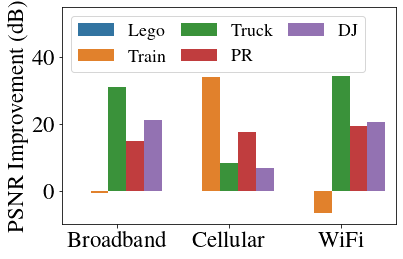

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


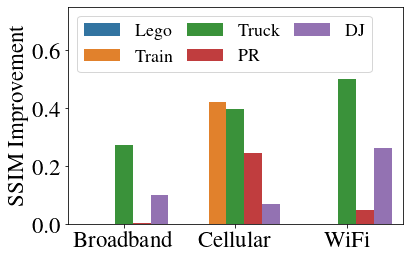

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


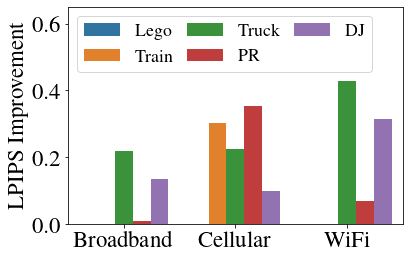

In [7]:
def improvement():
    roundNum = 0
    
    saveDir = Path(".")/"figs"/f"round{roundNum}"
    saveDir.mkdir(parents=True, exist_ok=True)
    
    df_all = pd.DataFrame()
    
    filePath = Path(".")/"csv_all"/f"round{roundNum}"/"all.csv"
    df = pd.read_csv(filePath)
    
    # Step 1: change to plotting format and filter
    df_plot = df
    df_plot = df_plot[df_plot["network"] == "broadband"]    
    for scene_name in df_plot["scene_name"].unique():
        opt_df = df_plot.loc[(df_plot["scene_name"] == scene_name) & (df_plot["type"] == "opt")].copy()
        gpcc_df = df_plot.loc[(df_plot["scene_name"] == scene_name) & (df_plot["type"] == "gpcc")].copy()
        
        tmp_psnr = opt_df["psnr"].iloc[0] - gpcc_df["psnr"].iloc[0]
        tmp_ssim = opt_df["ssim"].iloc[0] - gpcc_df["ssim"].iloc[0]
        tmp_lpips = gpcc_df["lpips"].iloc[0] - opt_df["lpips"].iloc[0]
        
        gpcc_df["psnr_diff"] = tmp_psnr
        gpcc_df["ssim_diff"] = tmp_ssim
        gpcc_df["lpips_diff"] = tmp_lpips
        
        df_all = df_all.append(gpcc_df)
    
    df_plot = df
    df_plot = df_plot[df_plot["network"] == "celullar"]
    for scene_name in df_plot["scene_name"].unique():
        opt_df = df_plot.loc[(df_plot["scene_name"] == scene_name) & (df_plot["type"] == "opt")].copy()
        gpcc_df = df_plot.loc[(df_plot["scene_name"] == scene_name) & (df_plot["type"] == "gpcc")].copy()
        
        tmp_psnr = opt_df["psnr"].iloc[0] - gpcc_df["psnr"].iloc[0]
        tmp_ssim = opt_df["ssim"].iloc[0] - gpcc_df["ssim"].iloc[0]
        tmp_lpips = gpcc_df["lpips"].iloc[0] - opt_df["lpips"].iloc[0]
        
        gpcc_df["psnr_diff"] = tmp_psnr
        gpcc_df["ssim_diff"] = tmp_ssim
        gpcc_df["lpips_diff"] = tmp_lpips
        
        df_all = df_all.append(gpcc_df)
    
    df_plot = df
    df_plot = df_plot[df_plot["network"] == "wifi"]
    for scene_name in df_plot["scene_name"].unique():
        opt_df = df_plot.loc[(df_plot["scene_name"] == scene_name) & (df_plot["type"] == "opt")].copy()
        gpcc_df = df_plot.loc[(df_plot["scene_name"] == scene_name) & (df_plot["type"] == "gpcc")].copy()
        
        tmp_psnr = opt_df["psnr"].iloc[0] - gpcc_df["psnr"].iloc[0]
        tmp_ssim = opt_df["ssim"].iloc[0] - gpcc_df["ssim"].iloc[0]
        tmp_lpips = gpcc_df["lpips"].iloc[0] - opt_df["lpips"].iloc[0]
        
        gpcc_df["psnr_diff"] = tmp_psnr
        gpcc_df["ssim_diff"] = tmp_ssim
        gpcc_df["lpips_diff"] = tmp_lpips
        
        df_all = df_all.append(gpcc_df)
    
    
    df_all['size_mean'] = df_all['size_mean'] * 8 / 1000000
    
    df_all['scene_name'] = df_all['scene_name'].replace(['drjohnson'], 'DJ')
    df_all['scene_name'] = df_all['scene_name'].replace(['playroom'], 'PR')
    df_all['scene_name'] = df_all['scene_name'].replace(['train'], 'Train')
    df_all['scene_name'] = df_all['scene_name'].replace(['truck'], 'Truck')
    df_plot['scene_name'] = df_plot['scene_name'].replace(['lego'], 'Lego')
    hue_order=["Lego", "Train", "Truck", "PR", "DJ"]
    
    df_all['network'] = df_all['network'].replace(['broadband'], 'Broadband')
    df_all['network'] = df_all['network'].replace(['celullar'], 'Cellular')
    df_all['network'] = df_all['network'].replace(['wifi'], 'WiFi')
    
    # Step 2: plot
    # label = []
    # for network in ["Broadband", "Cellular", "WiFi"]:
    #     for scene_name in ["DJ", "PR", "Train", "Truck"]:
    #         label.append((df_all.loc[(df_all["network"] == network) & (df_all["scene_name"] == scene_name)])["psnr"].iloc[0])
    # print(label)
    # ax.bar_label(ax.containers[0], label)
    
    # PSNR
    ax = sns.barplot(x='network', y='psnr_diff',
                    hue= "scene_name", hue_order=hue_order,
                    data=df_all, 
                    errorbar=('ci', 95)
                    )
    
        
    ax.set(xlabel='', ylabel='PSNR Improvement (dB)')
    ax.set(ylim = (-10, 55))
    # ax.set_yticks([30, 40, 50, 60])
    plt.legend(title='', loc='upper left', fontsize="18", markerscale=2, ncol=3, columnspacing=0.8)
    plt.savefig(f'{saveDir}/bit_allocation_improvement_psnr.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/bit_allocation_improvement_psnr.eps', dpi=300, bbox_inches='tight')
    plt.show()

    # SSIM
    ax = sns.barplot(x='network', y='ssim_diff',
                    hue= "scene_name", hue_order=hue_order,
                    data=df_all, 
                    errorbar=('ci', 95)
                    )
    
    ax.set(xlabel='', ylabel='SSIM Improvement')
    ax.set(ylim = (0.0, 0.75))
    # ax.set_yticks([30, 40, 50, 60])
    plt.legend(title='', loc='upper left', fontsize="18", markerscale=2, ncol=3, columnspacing=0.8)
    plt.savefig(f'{saveDir}/bit_allocation_improvement_ssim.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/bit_allocation_improvement_ssim.eps', dpi=300, bbox_inches='tight')
    plt.show()

    # LPIPS
    ax = sns.barplot(x='network', y='lpips_diff',
                    hue= "scene_name", hue_order=hue_order,
                    data=df_all, 
                    errorbar=('ci', 95)
                    )

    ax.set(xlabel='', ylabel='LPIPS Improvement')
    ax.set(ylim = (0.0, 0.65))
    # ax.set_yticks([30, 40, 50, 60])
    plt.legend(title='', loc='upper left', fontsize="18", markerscale=2, ncol=3, columnspacing=0.8)
    plt.savefig(f'{saveDir}/bit_allocation_improvement_lpips.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/bit_allocation_improvement_lpips.eps', dpi=300, bbox_inches='tight')
    plt.show()

    
    
improvement() 
      